In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

random.seed(12)

In [56]:
def width2var(w):
    var = (w/2)**2
    return var

In [57]:
# 1. medium area
mean_1 = (120, 500, 25)
cov_1 = [[width2var(80), 0, 0], [0, width2var(200), 0], [0, 0, 5]]
data_1 = np.random.multivariate_normal(mean_1, cov_1, (8))
data_1 = data_1.clip(0, 1290)
col_1 = 'black'

# 2. expensive area (innenstadt)
mean_2 = (500, 500, 35)
cov_2 = [[width2var(100), 0, 0], [0, width2var(100), 0], [0, 0, 5]]
data_2 = np.random.multivariate_normal(mean_2, cov_2, (15))
data_2 = data_2.clip(0, 1290)
col_2 = 'blue'

# 5. cheap area 
mean_5 = (400, 200, 22)
cov_5 = [[width2var(50), 0, 0], [0, width2var(50), 0], [0, 0, 5]]
data_5 = np.random.multivariate_normal(mean_5, cov_5, (15))
data_5 = data_5.clip(0, 1290)
col_5 = 'darkgreen'

# 6. really cheap area
mean_6 = (150, 150, 15)
cov_6 = [[width2var(100), 0, 0], [0, width2var(80), 0], [0, 0, 5]]
data_6 = np.random.multivariate_normal(mean_6, cov_6, (15))
data_6 = data_6.clip(0, 1290)
col_6 = 'orange'


In [58]:
data = np.concatenate((data_1, data_2, data_5, data_6))
locs = np.c_[data.T[0], data.T[1]]
rents = data.T[2]
print(locs)
print(rents)

[[162.67091512 429.11397167]
 [ 85.12830525 497.18886246]
 [125.01868785 317.2910507 ]
 [189.70161678 452.79408408]
 [128.40814759 563.4298936 ]
 [ 94.7986985  489.54628106]
 [ 31.90343927 454.77933096]
 [146.7292554  541.15176622]
 [578.9004275  456.33695503]
 [489.98401457 494.63810446]
 [488.0658296  412.62226709]
 [536.84079621 494.56688898]
 [507.19330971 484.2843986 ]
 [408.78415803 550.85415446]
 [503.26227867 513.15406645]
 [574.80327555 503.15913177]
 [473.6583816  541.35272015]
 [453.09145808 481.85503148]
 [488.92836962 458.22399323]
 [471.94476101 578.59503557]
 [458.75568027 542.97050887]
 [456.35356881 496.77707655]
 [511.60994224 460.33427936]
 [418.58686742 200.8067923 ]
 [342.34550521 219.84938824]
 [406.26377139 213.75303197]
 [369.26922549 173.60226083]
 [361.39540386 214.74747887]
 [431.88229864 210.66306482]
 [396.43487506 238.80266225]
 [414.3126315  198.24191191]
 [378.04948955 188.31343077]
 [422.60942891 203.60966928]
 [410.39767914 219.92887169]
 [372.62461926

(874, 620, 3)


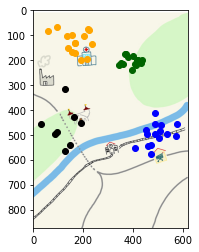

In [59]:
img = plt.imread("../assets/map_prototype.jpg")
fig, ax  = plt.subplots()
ax.imshow(img)
ax.scatter(data_1.T[0], data_1.T[1], color=col_1)
ax.scatter(data_2.T[0], data_2.T[1], color=col_2)
ax.scatter(data_5.T[0], data_5.T[1], color=col_5)
ax.scatter(data_6.T[0], data_6.T[1], color=col_6)

print(img.shape)


In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

#Fit a DecisionTree with depth 1 to the data
model = DecisionTreeRegressor(random_state=0, max_depth=2, min_samples_leaf=5)
model.fit(locs,rents)

#Create test data points and calculate prediction
locs_x_test = np.linspace(0, 1300, 100)
locs_y_test = np.linspace(0, 842, 65)
locs_test = np.array(np.meshgrid(locs_x_test, locs_y_test)).T.reshape(-1,2)
rents_pred = model.predict(locs_test)

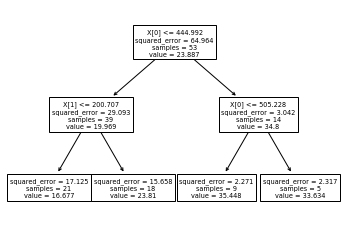

In [61]:
tree.plot_tree(model)
None

In [62]:
import TreeToReact as ttr
dict = ttr.export_for_react(model, img)
print(dict)


{'avgRent': 24, 'feature': 0, 'threshold': 72, 'children': [{'avgRent': 20, 'feature': 1, 'threshold': 23, 'children': [{'avgRent': 17, 'feature': -1, 'threshold': -1}, {'avgRent': 24, 'feature': -1, 'threshold': -1}]}, {'avgRent': 35, 'feature': 0, 'threshold': 81, 'children': [{'avgRent': 35, 'feature': -1, 'threshold': -1}, {'avgRent': 34, 'feature': -1, 'threshold': -1}]}]}


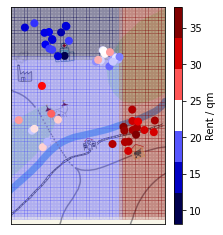

In [63]:
import matplotlib

img = plt.imread("../assets/map_prototype.jpg")
fig, ax  = plt.subplots()

# On my desktop, DPI gets scaled by 0.75
#fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

#Plot prediction of Decision tree
#old colormap: tab20b
cmap1 = 'seismic'
cmap2 = plt.get_cmap('seismic', 7)
ax.scatter(locs_test[:,0], locs_test[:,1], marker=",", c= rents_pred, cmap = cmap2, alpha = 0.1)

#Plot the sampled data points
ax.scatter(locs[:,0], locs[:,1], marker="o", c= rents, cmap = cmap1, linewidth=2)

ax.imshow(img)

#Add a colorbar
vmin = np.min(rents)
vmax = np.max(rents)
norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)

cax = fig.add_axes([ax.get_position().x1+0.02,ax.get_position().y0,0.02,ax.get_position().height])
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap2), cax=cax)
cbar.set_label('Rent / qm')

fig.tight_layout
None